In [1]:
import pyspedas 
from pytplot import tplot, tplot_names, get_data, store_data
from pyspedas import mms_load_fgm, mms_load_fpi
import matplotlib.pyplot as plt
import numpy as np
import math as math
import pytplot as py
import statistics as stat
from pyspedas.mms import fpi
import shelve



In [2]:
downstreamFgmData=[]
downstreamDensityData=[]
downstreamVelocityData=[]

upstreamFgmData=[]
upstreamDensityData=[]
upstreamVelocityData=[]
density_ratio = []
G_u=[]
G_d=[]

T_d_para=[]
T_d_perp=[]
T_d_tot=[]
T_u_para=[]
T_u_perp=[]
T_u_tot=[]
density_d_forstd=[]
density_u_forstd=[]



In [3]:
#(downstream to upstream)
def eventAvg(trangeD,trangeU):
    
    #downstream
    pyspedas.mms.fgm(trange=trangeD, time_clip=True )
    fpi(datatype = 'dis-moms', trange=trangeD, center_measurement=True,  time_clip=True)
    
    #fgm downstream 
    fgm_d = get_data('mms1_fgm_b_gse_srvy_l2')
    fgm_dx = [row[0] for row in fgm_d[1]]
    fgm_dy = [row[1] for row in fgm_d[1]]
    fgm_dz = [row[2] for row in fgm_d[1]]
    fgm_dx_avg = stat.mean(fgm_dx)
    fgm_dy_avg = stat.mean(fgm_dy)
    fgm_dz_avg = stat.mean(fgm_dz)
    fgm_d_total_avg = math.sqrt(fgm_dx_avg**2+fgm_dy_avg**2+fgm_dz_avg**2)
    downstreamFgmData.append(fgm_d_total_avg)
    arr_downstreamFgmData = np.array(downstreamFgmData)
    np.save('fgmd.npy',arr_downstreamFgmData)
    
    #convert from nT to gauss
    G_d.append(fgm_d_total_avg*1e-5)
    arr_G_d = np.array(G_d)
    np.save('G_d.npy',arr_G_d)
    
    
    #Density downstream
    density_d = get_data('mms1_dis_numberdensity_fast')
    density_d_avg = stat.mean(density_d[1])
    
    #density array for standard deviation
    density_d_forstd.append(np.array(density_d[1]))
    np.save('density_d_forstd.npy',density_d_forstd)
    
    downstreamDensityData.append(density_d_avg)
    arr_downstreamDensityData = np.array(downstreamDensityData)
    np.save('densityd.npy',arr_downstreamDensityData)
 

    
    #velocity downstream
    v_d = get_data('mms1_dis_bulkv_dbcs_fast')
    v_dx = [row[0] for row in v_d[1]]
    v_dy = [row[1] for row in v_d[1]]
    v_dz = [row[2] for row in v_d[1]]
    v_dx_avg = stat.mean(v_dx)
    v_dy_avg = stat.mean(v_dy)
    v_dz_avg = stat.mean(v_dz)
    v_d_total_avg = math.sqrt(v_dx_avg**2+v_dy_avg**2+v_dz_avg**2)
    downstreamVelocityData.append(v_d_total_avg)
    arr_downstreamVelocityData = np.array(downstreamVelocityData)
    np.save('velocityd.npy',arr_downstreamVelocityData)

    
    #temperature downstream  parallel 
    T_d_para_data= get_data('mms1_dis_temppara_fast')
    T_d_para_avg = np.mean(T_d_para_data[1])
    T_d_para.append(T_d_para_avg*11606)
    arr_T_d_para_avg = np.array(T_d_para)
    np.save('T_d_para.npy', arr_T_d_para_avg)
    
    #temperature downstream perpendicular
    T_d_perp_data=get_data('mms1_dis_tempperp_fast')
    T_d_perp_avg = np.mean(T_d_perp_data[1])
    T_d_perp.append(T_d_perp_avg*11606)
    arr_T_d_perp_avg = np.array(T_d_perp)
    np.save('T_d_perp.npy', arr_T_d_perp_avg)
      
    #temperature downstream total
    T_d_tot.append(((T_d_para_avg+2*T_d_perp_avg)/3)*11606)
    arr_T_d_tot = np.array(T_d_tot)
    np.save('T_d_tot.npy', arr_T_d_tot)
    
    #upstream 
    pyspedas.mms.fgm(trange=trangeU, time_clip=True )
    fpi(datatype = 'dis-moms', trange=trangeU, center_measurement=True,  time_clip=True)
    
    #fgm upstream
    fgm_u = get_data('mms1_fgm_b_gse_srvy_l2')
    fgm_ux = [row[0] for row in fgm_u[1]]
    fgm_uy = [row[1] for row in fgm_u[1]]
    fgm_uz = [row[2] for row in fgm_u[1]]
    fgm_ux_avg = stat.mean(fgm_ux)
    fgm_uy_avg = stat.mean(fgm_uy)
    fgm_uz_avg = stat.mean(fgm_uz)
    fgm_u_total_avg = math.sqrt(fgm_ux_avg**2+fgm_uy_avg**2+fgm_uz_avg**2)
    upstreamFgmData.append(fgm_u_total_avg)
    arr_upstreamFgmData = np.array(upstreamFgmData)
    np.save('fgmu.npy',arr_upstreamFgmData)

    #convert from nT to gauss
    G_u.append(fgm_u_total_avg*1e-5)
    arr_G_u = np.array(G_u)
    np.save('G_u.npy',arr_G_u)
    
    
    #Density upstream
    density_u = get_data('mms1_dis_numberdensity_fast')
    density_u_avg = stat.mean(density_u[1])
    density_u_forstd.append(np.array(density_u[1]))
    np.save('density_u_forstd.npy',density_u_forstd)
    upstreamDensityData.append(density_u_avg)
    arr_upstreamDensityData = np.array(upstreamDensityData)
    np.save('densityu.npy', arr_upstreamDensityData)
   



    
    #velocity upstream 
    v_u = get_data('mms1_dis_bulkv_dbcs_fast')
    v_ux = [row[0] for row in v_u[1]]
    v_uy = [row[1] for row in v_u[1]]
    v_uz = [row[2] for row in v_u[1]]
    v_ux_avg = stat.mean(v_ux)
    v_uy_avg = stat.mean(v_uy)
    v_uz_avg = stat.mean(v_uz)
    v_u_total_avg = math.sqrt(v_ux_avg**2+v_uy_avg**2+v_uz_avg**2)
    upstreamVelocityData.append(v_u_total_avg)
    arr_upstreamVelocityData = np.array(upstreamVelocityData)
    np.save('velocityu.npy',arr_upstreamVelocityData)

    
    #temperature upstream  parallel 
    T_u_para_data= get_data('mms1_dis_temppara_fast')
    T_u_para_avg = np.mean(T_u_para_data[1])
    T_u_para.append(T_u_para_avg*11606)
    arr_T_u_para_avg = np.array(T_u_para)
    np.save('T_u_para.npy', arr_T_u_para_avg)
    
    #temperature upstream perpendicular
    T_u_perp_data=get_data('mms1_dis_tempperp_fast')
    T_u_perp_avg = np.mean(T_u_perp_data[1])
    T_u_perp.append(T_u_perp_avg*11606)
    arr_T_u_perp_avg = np.array(T_u_perp)
    np.save('T_u_perp.npy', arr_T_u_perp_avg)
      
    #temperature downstream total
    T_u_tot.append(((T_u_para_avg+2*T_u_perp_avg)/3)*11606)
    arr_T_u_tot = np.array(T_u_tot)
    np.save('T_u_tot.npy', arr_T_u_tot)


    #density ratio
    d_ratio = density_d_avg/density_u_avg
    density_ratio.append(d_ratio)
    arr_d_ratio = np.array(density_ratio)
    np.save('D_ratio.npy',arr_d_ratio)
    
   
    return

    

In [4]:
'''


#ten minutes
eventAvg(['2018-01-10/00:30','2018-01-10/00:40'],['2018-01-10/01:10','2018-01-10/01:20'])#1
eventAvg(['2018-01-20/17:00','2018-01-20/17:10'],['2018-01-20/16:10','2018-01-20/16:20'])#2
eventAvg(['2018-01-21/06:10','2018-01-21/06:20'],['2018-01-21/07:10','2018-01-21/07:20'])#3
eventAvg(['2018-01-23/10:50','2018-01-23/11:00'],['2018-01-23/08:20','2018-01-23/08:30'])#4
eventAvg(['2018-01-24/03:00','2018-01-24/03:10'],['2018-01-24/05:40','2018-01-24/05:50'])#5
eventAvg(['2018-01-29/16:50','2018-01-29/17:00'],['2018-01-29/18:50','2018-01-29/19:00'])#6updated
eventAvg(['2018-02-04/08:10','2018-02-04/08:20'],['2018-02-04/09:45','2018-02-04/09:55'])#7updated 
eventAvg(['2018-02-07/06:10','2018-02-07/06:20'],['2018-02-07/07:40','2018-02-07/07:50'])#8# this example
eventAvg(['2018-02-15/13:30','2018-02-15/13:40'],['2018-02-15/15:40','2018-02-15/15:50'])#9#good but really high 
eventAvg(['2018-02-17/22:10','2018-02-17/22:20'],['2018-02-17/19:30','2018-02-17/19:40'])#10 its fine. 
eventAvg(['2018-02-18/12:30','2018-02-18/12:40'],['2018-02-18/14:50','2018-02-18/15:00'])#11
eventAvg(['2018-02-20/15:30','2018-02-20/15:40'],['2018-02-20/13:20','2018-02-20/13:30'])#12
eventAvg(['2018-02-21/08:45','2018-02-21/08:55'],['2018-02-21/10:30','2018-02-21/10:40'])#13new updated 
eventAvg(['2018-02-26/07:50','2018-02-26/08:00'],['2018-02-26/06:30','2018-02-26/06:40'])#14
eventAvg(['2018-03-01/20:50','2018-03-01/21:00'],['2018-03-01/22:10','2018-03-01/22:20'])#15
eventAvg(['2018-03-09/11:10','2018-03-09/11:20'],['2018-03-09/10:40','2018-03-09/10:50'])#16
eventAvg(['2018-03-12/09:30','2018-03-12/09:40'],['2018-03-12/08:00','2018-03-12/08:10'])#17
#maybe try find more 03 events 

eventAvg(['2019-01-16/05:40','2019-01-16/05:50'],['2019-01-16/02:20','2019-01-16/02:30'])#18
eventAvg(['2019-01-22/10:00','2019-01-22/10:10'],['2019-01-22/12:20','2019-01-22/12:30'])#19
eventAvg(['2019-01-30/05:50','2019-01-30/06:00'],['2019-01-30/03:20','2019-01-30/03:30'])#20


eventAvg(['2018-12-04/18:20','2018-12-04/18:30'],['2018-12-04/16:10','2018-12-04/16:20'])#21 

eventAvg(['2018-12-07/13:00','2018-12-07/13:10'],['2018-12-07/11:20','2018-12-07/11:30'])#22
eventAvg(['2018-12-10/11:00','2018-12-10/11:10'],['2018-12-10/07:00','2018-12-10/07:10'])#23 

eventAvg(['2018-12-13/02:40','2018-12-13/02:50'],['2018-12-13/01:20','2018-12-13/01:30'])#24

eventAvg(['2018-12-15/23:40','2018-12-15/23:50'],['2018-12-15/23:00','2018-12-15/23:10'])#25

eventAvg(['2018-12-18/19:40','2018-12-18/19:50'],['2018-12-18/23:00','2018-12-18/23:10'])#26 

eventAvg(['2018-12-21/16:20','2018-12-21/16:30'],['2018-12-21/13:30','2018-12-21/13:20'])#27

eventAvg(['2018-12-24/12:30','2018-12-24/12:40'],['2018-12-24/11:10','2018-12-24/11:20'])#28

eventAvg(['2018-12-27/09:10','2018-12-27/09:20'],['2018-12-27/06:00','2018-12-27/06:10'])#29


eventAvg(['2019-01-01/23:40','2019-01-01/23:50'],['2019-01-01/22:20','2019-01-01/22:30'])#30

eventAvg(['2019-01-04/23:30','2019-01-04/23:40'],['2019-01-04/20:50','2019-01-04/21:00'])#30





eventAvg(['2018-03-16/01:10','2018-03-16/01:20'],['2018-03-16/02:40','2018-03-16/02:30'])#26

eventAvg(['2018-03-18/20:00','2018-03-18/20:10'],['2018-03-18/21:30','2018-03-18/21:40'])#27

eventAvg(['2018-03-21/17:20','2018-03-21/17:30'],['2018-03-21/18:50','2018-03-21/19:00'])#28

eventAvg(['2018-03-26/11:50','2018-03-26/12:00'],['2018-03-26/09:30','2018-03-26/09:40'])#29

eventAvg(['2018-03-29/04:40','2018-03-29/04:50'],['2018-03-29/02:30','2018-03-29/02:40'])#30

eventAvg(['2018-04-01/02:05','2018-04-01/02:15'],['2018-04-01/00:50','2018-04-01/01:00'])#31

eventAvg(['2018-04-03/16:10','2018-04-03/16:20'],['2018-04-03/14:00','2018-04-03/14:10'])#32

eventAvg(['2018-04-06/17:30','2018-04-06/17:40'],['2018-04-06/14:10','2018-04-06/14:20'])#33

eventAvg(['2018-04-09/11:30','2018-04-09/11:40'],['2018-04-09/09:50','2018-04-09/10:00'])#34

eventAvg(['2018-04-12/06:55','2018-04-12/07:05'],['2018-04-12/04:40','2018-04-12/04:50'])#35

eventAvg(['2018-04-14/22:00','2018-04-14/22:10'],['2018-04-14/21:20','2018-04-14/21:30'])#36










#extra events
eventAvg(['2018-01-01/12:40','2018-01-01/12:50'],['2018-01-01/13:30','2018-01-01/13:40'])#29


eventAvg(['2018-01-04/09:10','2018-01-04/09:20'],['2018-01-04/10:30','2018-01-04/10:40'])#31


eventAvg(['2018-01-06/15:15','2018-01-06/15:25'],['2018-01-06/12:20','2018-01-06/12:30'])#32


eventAvg(['2018-01-07/04:10','2018-01-07/04:20'],['2018-01-07/06:40','2018-01-07/06:50'])#33

eventAvg(['2018-01-12/03:30','2018-01-12/03:40'],['2018-01-12/02:10','2018-01-12/02:20'])#34

eventAvg(['2018-01-17/18:50','2018-01-17/19:00'],['2018-01-17/17:50','2018-01-17/18:00'])#35

eventAvg(['2018-01-18/11:20','2018-01-18/11:30'],['2018-01-18/12:30','2018-01-18/12:40'])#36

eventAvg(['2018-01-26/08:30','2018-01-26/08:40'],['2018-01-26/07:20','2018-01-26/07:30'])#37

eventAvg(['2018-02-09/09:40','2018-02-09/09:50'],['2018-02-09/08:50','2018-02-09/09:00'])#38


eventAvg(['2018-02-10/00:10','2018-02-10/00:20'],['2018-02-10/01:20','2018-02-10/01:30'])#39
eventAvg(['2018-02-12/07:20','2018-02-12/07:30'],['2018-02-12/04:40','2018-02-12/04:50'])#40new 


eventAvg(['2018-02-12/19:30','2018-02-12/19:40'],['2018-02-12/20:20','2018-02-12/20:30'])#41










'''


18-Jan-22 12:13:17: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180110_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:13:26: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180110000000_v3.3.0.cdf
18-Jan-22 12:13:26: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:13:26: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:13:28: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180110_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:13:36: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180110000000_v3.3.0.cdf
18-Jan-22 12:13:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:13:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:13:38: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180120_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:13:48: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180120160000_v3.3.0.cdf
18-Jan-22 12:13:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:13:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:13:49: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180120_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:13:59: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180120160000_v3.3.0.cdf
18-Jan-22 12:13:59: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:13:59: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:14:00: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180121_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:14:10: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180121060000_v3.3.0.cdf
18-Jan-22 12:14:11: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:14:11: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:14:12: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180121_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:14:22: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180121060000_v3.3.0.cdf
18-Jan-22 12:14:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:14:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:14:24: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180123_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:14:36: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180123100000_v3.3.0.cdf
18-Jan-22 12:14:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:14:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:14:40: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180123_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:14:51: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180123080000_v3.3.0.cdf
18-Jan-22 12:14:52: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:14:52: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:14:53: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180124_v5.122.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:15:03: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180124020000_v3.3.0.cdf
18-Jan-22 12:15:03: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:15:03: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:15:05: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180124_v5.122.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:15:15: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180124040000_v3.3.0.cdf
18-Jan-22 12:15:15: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:15:15: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:15:17: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180129_v5.125.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:15:31: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180129160000_v3.3.0.cdf
18-Jan-22 12:15:31: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:15:31: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:15:33: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180129_v5.125.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:15:46: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180129180000_v3.3.0.cdf
18-Jan-22 12:15:46: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:15:46: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:15:48: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180204_v5.126.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:15:58: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180204080000_v3.3.0.cdf
18-Jan-22 12:15:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:15:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:16:00: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180204_v5.126.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:16:10: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180204080000_v3.3.0.cdf
18-Jan-22 12:16:10: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:16:10: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:16:11: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180207_v5.125.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:16:22: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180207060000_v3.3.0.cdf
18-Jan-22 12:16:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:16:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:16:24: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180207_v5.125.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:16:33: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180207060000_v3.3.0.cdf
18-Jan-22 12:16:33: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:16:33: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:16:35: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180215_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:16:48: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180215120000_v3.3.0.cdf
18-Jan-22 12:16:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:16:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:16:50: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180215_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:17:02: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180215140000_v3.3.0.cdf
18-Jan-22 12:17:02: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:17:02: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:17:04: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180217_v5.126.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:17:14: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180217220000_v3.3.0.cdf
18-Jan-22 12:17:14: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:17:14: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:17:16: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180217_v5.126.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:17:25: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180217180000_v3.3.0.cdf
18-Jan-22 12:17:25: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:17:25: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:17:27: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180218_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:17:38: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180218120000_v3.3.0.cdf
18-Jan-22 12:17:38: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:17:38: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:17:40: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180218_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:17:50: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180218140000_v3.3.0.cdf
18-Jan-22 12:17:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:17:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:17:52: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180220_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:18:02: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180220140000_v3.3.0.cdf
18-Jan-22 12:18:02: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:18:02: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:18:05: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180220_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:18:14: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180220120000_v3.3.0.cdf
18-Jan-22 12:18:15: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:18:15: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:18:16: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180221_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:18:27: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180221080000_v3.3.0.cdf
18-Jan-22 12:18:27: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:18:27: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:18:29: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180221_v5.128.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:18:40: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180221100000_v3.3.0.cdf
18-Jan-22 12:18:40: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:18:40: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:18:42: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180226_v5.129.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:18:54: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180226060000_v3.3.0.cdf
18-Jan-22 12:18:54: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:18:54: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:18:56: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180226_v5.129.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:19:07: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180226060000_v3.3.0.cdf
18-Jan-22 12:19:07: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:19:07: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:19:09: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180301_v5.129.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:19:21: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180301200000_v3.3.0.cdf
18-Jan-22 12:19:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:19:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:19:23: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180301_v5.129.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:19:36: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180301220000_v3.3.0.cdf
18-Jan-22 12:19:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:19:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:19:37: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180309_v5.130.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:19:48: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180309100000_v3.3.0.cdf
18-Jan-22 12:19:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:19:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:19:50: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180309_v5.130.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:20:00: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180309100000_v3.3.0.cdf
18-Jan-22 12:20:00: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:20:00: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:20:02: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180312_v5.131.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:20:14: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180312080000_v3.3.0.cdf
18-Jan-22 12:20:14: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:20:14: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:20:16: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180312_v5.131.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:20:26: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180312060000_v3.3.0.cdf
18-Jan-22 12:20:26: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180312080000_v3.3.0.cdf
18-Jan-22 12:20:26: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:20:26: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:20:29: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190116_v5.175.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:20:44: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190116040000_v3.3.0.cdf
18-Jan-22 12:20:44: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:20:44: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:20:46: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190116_v5.175.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:20:58: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190116020000_v3.3.0.cdf
18-Jan-22 12:20:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:20:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:21:00: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190122_v5.176.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:21:12: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190122080000_v3.3.0.cdf
18-Jan-22 12:21:12: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190122100000_v3.3.0.cdf
18-Jan-22 12:21:12: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:21:12: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:21:15: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190122_v5.176.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:21:26: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190122120000_v3.3.0.cdf
18-Jan-22 12:21:26: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:21:26: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:21:28: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190130_v5.177.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:21:40: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190130040000_v3.3.0.cdf
18-Jan-22 12:21:40: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:21:40: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:21:42: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190130_v5.177.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:21:53: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190130020000_v3.3.0.cdf
18-Jan-22 12:21:53: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:21:53: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:21:55: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181204_v5.167.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:22:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181204180000_v3.3.0.cdf
18-Jan-22 12:22:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:22:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:22:08: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181204_v5.167.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:22:20: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181204160000_v3.3.0.cdf
18-Jan-22 12:22:20: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:22:20: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:22:22: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181207_v5.167.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:22:34: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181207120000_v3.3.0.cdf
18-Jan-22 12:22:35: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:22:35: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:22:37: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181207_v5.167.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:22:50: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181207100000_v3.3.0.cdf
18-Jan-22 12:22:51: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:22:51: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:22:53: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181210_v5.169.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:23:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181210100000_v3.3.0.cdf
18-Jan-22 12:23:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:23:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:23:07: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181210_v5.169.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:23:19: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181210060000_v3.3.0.cdf
18-Jan-22 12:23:19: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:23:19: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:23:21: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181213_v5.170.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:23:34: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181213020000_v3.3.0.cdf
18-Jan-22 12:23:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:23:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:23:36: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181213_v5.170.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:23:47: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181213000000_v3.3.0.cdf
18-Jan-22 12:23:47: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:23:47: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:23:49: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181215_v5.169.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:23:58: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181215220000_v3.3.1.cdf
18-Jan-22 12:23:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:23:59: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:24:00: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181215_v5.169.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:24:10: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181215220000_v3.3.1.cdf
18-Jan-22 12:24:10: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:24:10: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:24:12: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181218_v5.169.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:24:22: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181218180000_v3.3.0.cdf
18-Jan-22 12:24:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:24:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:24:24: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181218_v5.169.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:24:34: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181218220000_v3.3.0.cdf
18-Jan-22 12:24:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:24:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:24:36: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181221_v5.170.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:24:48: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181221160000_v3.3.0.cdf
18-Jan-22 12:24:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:24:48: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:24:51: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181221_v5.170.0.cdf


Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2
mms1_fgm_b_dmpa_srvy_l2_bvec
mms1_fgm_b_dmpa_srvy_l2_btot
mms1_fg

18-Jan-22 12:25:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181221120000_v3.3.0.cdf
18-Jan-22 12:25:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:25:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Star

18-Jan-22 12:25:13: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181224_v5.172.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:25:25: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181224120000_v3.3.0.cdf
18-Jan-22 12:25:25: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:25:25: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:25:28: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181224_v5.172.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:25:39: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181224100000_v3.3.0.cdf
18-Jan-22 12:25:39: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:25:39: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:25:41: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181227_v5.172.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:25:54: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181227080000_v3.3.0.cdf
18-Jan-22 12:25:54: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:25:54: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:25:56: Loading pydata/mms1/fgm/srvy/l2/2018/12/mms1_fgm_srvy_l2_20181227_v5.172.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:26:08: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181227040000_v3.3.0.cdf
18-Jan-22 12:26:08: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/12/mms1_fpi_fast_l2_dis-moms_20181227060000_v3.3.0.cdf
18-Jan-22 12:26:08: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:26:08: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:26:11: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190101_v5.171.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:26:22: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190101220000_v3.3.0.cdf
18-Jan-22 12:26:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:26:22: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:26:24: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190101_v5.171.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:26:34: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190101220000_v3.3.0.cdf
18-Jan-22 12:26:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:26:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:26:35: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190104_v5.172.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:26:50: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190104220000_v3.3.0.cdf
18-Jan-22 12:26:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:26:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:26:53: Loading pydata/mms1/fgm/srvy/l2/2019/01/mms1_fgm_srvy_l2_20190104_v5.172.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:27:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2019/01/mms1_fpi_fast_l2_dis-moms_20190104200000_v3.3.0.cdf
18-Jan-22 12:27:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:27:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:27:09: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180316_v5.130.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:27:19: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180316000000_v3.3.0.cdf
18-Jan-22 12:27:19: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:27:19: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:27:21: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180316_v5.130.0.cdf


Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2
mms1_fgm_b_dmpa_srvy_l2_bvec
mms1_fgm_b_dmpa_srvy_l2_btot
mms1_fg

18-Jan-22 12:27:33: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180316020000_v3.3.0.cdf
18-Jan-22 12:27:33: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:27:33: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Start time is larger than end time.
Error: Star

18-Jan-22 12:27:38: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180318_v5.132.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:27:50: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180318180000_v3.3.0.cdf
18-Jan-22 12:27:50: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180318200000_v3.3.0.cdf
18-Jan-22 12:27:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:27:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:27:53: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180318_v5.132.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:28:04: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180318200000_v3.3.0.cdf
18-Jan-22 12:28:04: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:28:04: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:28:05: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180321_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:28:16: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180321160000_v3.3.0.cdf
18-Jan-22 12:28:16: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:28:16: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:28:18: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180321_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:28:28: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180321180000_v3.3.0.cdf
18-Jan-22 12:28:28: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:28:28: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:28:30: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180326_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:28:41: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180326100000_v3.3.0.cdf
18-Jan-22 12:28:41: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:28:41: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:28:43: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180326_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:28:53: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180326080000_v3.3.0.cdf
18-Jan-22 12:28:53: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:28:53: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:28:55: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180329_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:29:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180329040000_v3.3.0.cdf
18-Jan-22 12:29:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:29:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:29:08: Loading pydata/mms1/fgm/srvy/l2/2018/03/mms1_fgm_srvy_l2_20180329_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:29:18: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/03/mms1_fpi_fast_l2_dis-moms_20180329020000_v3.3.0.cdf
18-Jan-22 12:29:18: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:29:18: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:29:20: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180401_v5.134.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:29:30: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180401020000_v3.3.0.cdf
18-Jan-22 12:29:30: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:29:30: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:29:32: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180401_v5.134.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:29:41: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180401000000_v3.3.0.cdf
18-Jan-22 12:29:41: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:29:41: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:29:43: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180403_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:29:55: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180403160000_v3.3.0.cdf
18-Jan-22 12:29:55: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:29:55: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:29:57: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180403_v5.133.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:30:08: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180403120000_v3.3.0.cdf
18-Jan-22 12:30:08: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180403140000_v3.3.0.cdf
18-Jan-22 12:30:08: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:30:08: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:30:11: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180406_v5.134.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:30:23: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180406160000_v3.3.0.cdf
18-Jan-22 12:30:23: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:30:23: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:30:25: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180406_v5.134.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:30:37: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180406140000_v3.3.0.cdf
18-Jan-22 12:30:37: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:30:37: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:30:39: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180409_v5.135.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:30:52: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180409100000_v3.3.0.cdf
18-Jan-22 12:30:52: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:30:52: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:30:54: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180409_v5.135.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:31:07: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180409080000_v3.3.0.cdf
18-Jan-22 12:31:07: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:31:07: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:31:09: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180412_v5.135.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:31:20: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180412060000_v3.3.0.cdf
18-Jan-22 12:31:20: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:31:20: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:31:22: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180412_v5.135.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:31:34: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180412040000_v3.3.0.cdf
18-Jan-22 12:31:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:31:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:31:36: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180414_v5.134.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:31:50: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180414200000_v3.3.0.cdf
18-Jan-22 12:31:50: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180414220000_v3.3.0.cdf
18-Jan-22 12:31:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:31:50: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:31:53: Loading pydata/mms1/fgm/srvy/l2/2018/04/mms1_fgm_srvy_l2_20180414_v5.134.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:32:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/04/mms1_fpi_fast_l2_dis-moms_20180414200000_v3.3.0.cdf
18-Jan-22 12:32:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:32:07: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:32:09: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180101_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:32:21: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180101120000_v3.3.0.cdf
18-Jan-22 12:32:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:32:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:32:23: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180101_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:32:36: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180101120000_v3.3.0.cdf
18-Jan-22 12:32:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:32:36: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:32:37: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180104_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:32:47: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180104080000_v3.3.0.cdf
18-Jan-22 12:32:47: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:32:47: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:32:49: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180104_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:32:58: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180104100000_v3.3.0.cdf
18-Jan-22 12:32:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:32:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:33:00: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180106_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:33:10: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180106140000_v3.3.0.cdf
18-Jan-22 12:33:10: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:33:10: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:33:12: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180106_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:33:21: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180106120000_v3.3.0.cdf
18-Jan-22 12:33:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:33:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:33:23: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180107_v5.119.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:33:32: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180107040000_v3.3.0.cdf
18-Jan-22 12:33:32: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:33:32: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:33:34: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180107_v5.119.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:33:43: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180107060000_v3.3.0.cdf
18-Jan-22 12:33:44: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:33:44: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:33:45: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180112_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:33:58: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180112020000_v3.3.0.cdf
18-Jan-22 12:33:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:33:58: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:33:59: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180112_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:34:11: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180112020000_v3.3.0.cdf
18-Jan-22 12:34:11: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:34:11: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:34:13: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180117_v5.121.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:34:23: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180117180000_v3.3.0.cdf
18-Jan-22 12:34:23: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:34:23: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:34:25: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180117_v5.121.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:34:34: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180117160000_v3.3.0.cdf
18-Jan-22 12:34:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:34:34: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:34:36: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180118_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:34:45: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180118100000_v3.3.0.cdf
18-Jan-22 12:34:46: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:34:46: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:34:47: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180118_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:34:56: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180118120000_v3.3.0.cdf
18-Jan-22 12:34:57: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:34:57: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:34:58: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180126_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:35:09: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180126080000_v3.3.0.cdf
18-Jan-22 12:35:09: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:35:09: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:35:11: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180126_v5.123.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:35:21: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180126060000_v3.3.0.cdf
18-Jan-22 12:35:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:35:21: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:35:23: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180209_v5.126.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:35:33: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180209080000_v3.3.0.cdf
18-Jan-22 12:35:33: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:35:33: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:35:35: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180209_v5.126.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:35:45: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180209080000_v3.3.0.cdf
18-Jan-22 12:35:45: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:35:45: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:35:47: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180210_v5.125.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:35:56: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180210000000_v3.3.0.cdf
18-Jan-22 12:35:56: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:35:56: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:35:58: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180210_v5.125.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:36:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180210000000_v3.3.0.cdf
18-Jan-22 12:36:07: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:36:07: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:36:08: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180212_v5.127.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:36:19: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180212060000_v3.3.0.cdf
18-Jan-22 12:36:20: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:36:20: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:36:21: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180212_v5.127.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:36:32: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180212040000_v3.3.0.cdf
18-Jan-22 12:36:32: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:36:32: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:36:34: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180212_v5.127.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:36:49: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180212180000_v3.3.0.cdf
18-Jan-22 12:36:49: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:36:49: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

18-Jan-22 12:36:51: Loading pydata/mms1/fgm/srvy/l2/2018/02/mms1_fgm_srvy_l2_20180212_v5.127.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

18-Jan-22 12:37:06: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/02/mms1_fpi_fast_l2_dis-moms_20180212200000_v3.3.0.cdf
18-Jan-22 12:37:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

18-Jan-22 12:37:06: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

In [8]:
x=len(np.load('G_u.npy'))
B=np.load('G_u.npy')
B_d=np.load('G_d.npy')
n_u=np.load('densityu.npy')
n_d=np.load('densityd.npy')
densityRatio_mms=np.load('D_ratio.npy')


proton_g=1.6726219e-24
proton_kg=1.6726219e-27
v_u=np.load('velocityu.npy')
v_d=np.load('velocityd.npy')
t_parad=np.load('T_d_para.npy')
t_perpd =np.load('T_d_perp.npy')
t_totd=np.load('T_d_tot.npy')
t_parau=np.load('T_u_para.npy')
t_perpu=np.load('T_u_perp.npy')
t_totu=np.load('T_u_tot.npy')
i=[]
gamma=5/3
k= 1.380649e-23
alfven_speed=[]
alfven_speed_d=[]
alfven_R=[]
alfven_M=[]
alfven_M_d=[]


pressure_u=[]
pressure_d=[]
pressure_R=[]
pressure_R_mms=[]

v_soundpara=[]
v_soundperp=[]
v_soundtot=[]


#v_sound_d=[]

sonic_Mpara=[]
sonic_Mperp=[]
sonic_Mtot=[]



sonic_M_d=[]
sonic_R=[]
sonic_M_d_mms=[]


t_ratio=[]
fgmT=np.load('fgmu.npy')
fgm_d=np.load('fgmd.npy')


density_d_each= np.load('density_d_forstd.npy', allow_pickle=True)
std_d=[]
density_u_each=np.load('density_u_forstd.npy',allow_pickle=True)
std_u=[]
std_R=[]


print(x)
def mach():
    for i in range(x):
        # finding standard deviation 
        std_d.append(np.std(density_d_each[i]))
        arr_std_d =np.array(std_d)
        np.save('std_density_d_each.npy', arr_std_d)
        std_u.append(np.std(density_u_each[i]))
        arr_std_u= np.array(std_u)
        np.save('std_density_u_each.npy',arr_std_u)
        std_R.append(np.sqrt((arr_std_u[i]/n_u[i])**2+(arr_std_d[i]/n_d[i])**2)*densityRatio_mms[i])
        errR=np.array(std_R)
        np.save('errR.npy',errR)
               
               
        #finding alfven speed upstream b/sqrt()
        alfven_speed.append(((B[i])/(np.sqrt(4*np.pi*n_u[i]*proton_g)))*1e-5)
        arr_alfven_speed = np.array(alfven_speed)
        np.save('arr_alfven_speed.npy', arr_alfven_speed)
        
        #alfven mach number v/va
        alfven_M.append((v_u[i])/arr_alfven_speed[i])
        arr_alfven_M = np.array(alfven_M)
        np.save('arr_Alfven_M.npy',arr_alfven_M)
        
        #alfven mach density ratio equation
        alfven_R.append(((gamma+1)*(arr_alfven_M[i])**2)/(2+(gamma-1)*(arr_alfven_M[i])**2))
        arr_alfven_R=np.array(alfven_R)
        np.save('arr_alfven_R.npy', arr_alfven_R)
        
        #speed of sound
        v_soundpara.append(np.sqrt((gamma*k*t_parau[i])/proton_kg))
        arr_v_soundpara = np.array(v_soundpara)
        v_soundperp.append(np.sqrt((gamma*k*t_perpu[i])/proton_kg))
        arr_v_soundperp = np.array(v_soundperp)
        v_soundtot.append(np.sqrt((gamma*k*t_totu[i])/proton_kg))
        arr_v_soundtot = np.array(v_soundtot)
        # sonic mach parallel temperature 
        sonic_Mpara.append(v_u[i]*1000/arr_v_soundpara[i])
        arr_sonic_Mpara = np.array(sonic_Mpara)
        np.save('sonic_Mpara.npy', arr_sonic_Mpara)
        #sonic perp temperature       
        sonic_Mperp.append(v_u[i]*1000/arr_v_soundperp[i])
        arr_sonic_Mperp = np.array(sonic_Mperp)
        np.save('sonic_Mperp.npy', arr_sonic_Mperp)


        #sonic total temperature
        sonic_Mtot.append(v_u[i]*1000/arr_v_soundtot[i])
        arr_sonic_Mtot = np.array(sonic_Mtot)
        np.save('sonic_Mtot.npy', arr_sonic_Mtot)
        
        
        

        
    return arr_alfven_M, sonic_Mpara, sonic_Mperp, sonic_Mtot
mach()
#sonic_Mpara, sonic_Mperp, sonic_Mtot

   # arr_alfven_M,

54


(array([ 9.3627519 ,  8.83274084, 10.73817413,  6.68996937, 14.55913021,
        13.38863231,  8.77987044, 10.62377327,  9.95977988, 14.94884014,
         8.20917469, 12.2018838 , 11.83809489,  7.77724275, 10.81631068,
         6.91654789, 12.32270573,  8.42214385,  9.7172983 , 11.60579722,
        17.71433781,  9.42891093, 22.49805906, 10.74058865, 10.32743644,
         2.3228978 ,  4.93856027, 13.72862358, 10.08591097,  8.16747891,
         7.83975759,  9.20354886,  8.10251268,  9.06253718, 11.48880409,
         8.85024105,  9.96744294,  9.55238835,  7.7427189 ,  7.36070323,
        14.05342396, 11.70081082,  7.59799856,  8.96683242, 13.30289815,
        14.00436774, 11.17311775,  7.56007413, 12.77350952, 14.2695785 ,
         7.87394083, 12.64732552,  9.82163867, 14.15859672]),
 [5.817218850567399,
  4.283219617136417,
  2.392017669379863,
  1.8158962662041214,
  5.1746522763399305,
  2.92136821738863,
  1.655319752589489,
  1.5491574832626551,
  4.752235683017756,
  5.4532296228946

In [60]:
densityRatio_mms=np.load('D_ratio.npy')
print(densityRatio_mms)
density_u=np.load('densityu.npy')
density_d=np.load('densityd.npy')

#standard deviation for each event
std_density_u= np.load('std_density_u_each.npy')
std_density_d= np.load('std_density_d_each.npy')
std_density_R=np.load('errR.npy')
#print(std_density_R)
print(std_density_d)
print(std_density_u)

sonic_Machpara= np.load('sonic_Mpara.npy')
sonic_Machperp= np.load('sonic_Mperp.npy')
sonic_Machtot= np.load('sonic_Mtot.npy')







alfven_Mach=np.load('arr_alfven_M.npy')

alfven_R_eq=np.load('arr_alfven_R.npy')





[4.3926783  3.9852297  4.14397    5.575202   3.8149128  5.0785203
 6.6565914  3.7241364  7.089564   5.031051   3.0285287  5.0894074
 3.469785   4.1591883  4.539348   3.7164085  4.969516   4.049137
 5.4239435  6.792644   1.5319744  2.8697374  3.1732924  3.191
 5.0277805  0.46350288 1.7828962  3.3679345  4.32311    2.2503858
 3.0456202  3.3888772  2.690233   4.5236397  3.2451103  3.4813888
 4.570746   3.9618192  4.9636726  3.5879412  2.7365217  4.0142922
 4.106563   5.5755806  6.2358904  5.7170534  4.8756084  5.0989823
 6.9170475  2.8921819  5.370684   5.363173   8.637647   6.838623  ]
[1.4108132  1.4605567  2.2267244  0.62670445 0.8654858  2.303209
 3.5907683  0.96705824 3.9195     4.941874   1.8484501  0.61094445
 1.785515   1.2246948  0.93901813 1.8172853  1.0596985  2.8073995
 1.8099152  1.5629886  0.686      1.524208   1.1710583  0.59035474
 1.5323851  0.594286   0.6370768  0.77204335 2.493365   1.3021551
 3.1957097  0.971235   1.4162222  2.536246   0.88510627 1.4055932
 1.8448529  

Text(0.5, 1.0, 'Downstream Density SD')

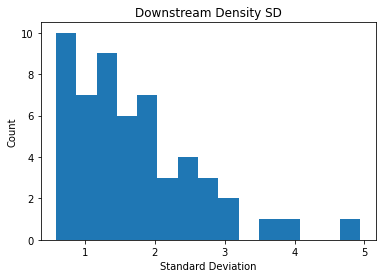

In [105]:
plt.hist(std_density_d,bins=15)
plt.xlabel('Standard Deviation')
plt.ylabel('Count')
plt.title('Downstream Density SD')

Text(0.5, 1.0, 'Upstream Density SD')

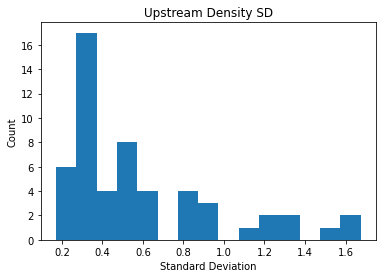

In [103]:
plt.hist(std_density_u, bins=15)
plt.xlabel('Standard Deviation')
plt.ylabel('Count')
plt.title('Upstream Density SD')


Text(0.5, 1.0, 'MHD Fluid Shock Example')

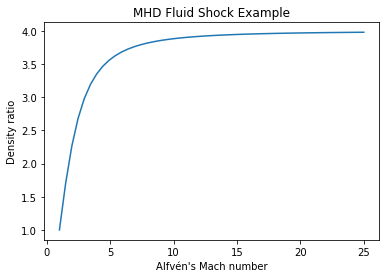

In [19]:
num= np.linspace(1,25)

  
r=((gamma+1)*(num**2))/(2+(gamma-1)*(num**2))
m2= np.sqrt(((gamma-1)*(num**2)+2)/((2*gamma*(num**2)-(gamma-1))))
t_r=(2*gamma*(num**2)-(gamma-1))*(2+(gamma-1)*(num**2))/((gamma+1)**2*num**2)
p_r= (2*gamma*(num**2)-(gamma-1))/(gamma+1)
fourx= num*4

    
plt.plot(num,r, label='Density ratio')
#plt.plot(num,m2,label='Downstream Mach number')
#plt.plot(num,t_r, label='Temperature ratio')
#plt.plot(num,p_r, label='Pressure ratio')
plt.xlabel("Alfvén's Mach number")
plt.ylabel('Density ratio')
plt.title('MHD Fluid Shock Example')
#plt.legend(loc='lower right')


1.5039504 4.3435235


Text(7, 7, 'SD=1.504')

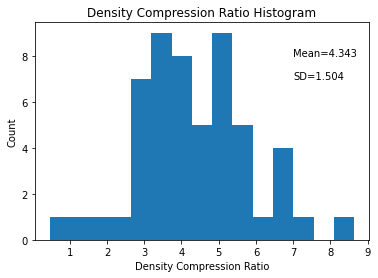

In [117]:
#plt.hist(densityRatio_mms, label="Density ratio")
plt.hist(densityRatio_mms, bins=15)

plt.xlabel('Density Compression Ratio')
plt.ylabel('Count')
plt.title('Density Compression Ratio Histogram')
print(np.std(densityRatio_mms),np.mean(densityRatio_mms))
plt.text(7,8,'Mean=4.343')
plt.text(7,7,'SD=1.504')







Text(0.5, 1.0, 'Density Compression Ratio')

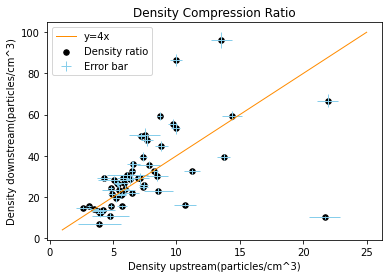

In [107]:
    plt.errorbar(density_u, density_d, yerr=std_density_d, xerr=std_density_u, linewidth=1, fmt="o", marker = '.', ms=0, ecolor='skyblue', label='Error bar', mew=0.1)

plt.scatter(density_u, density_d, label='Density ratio', color="black", s=30)


plt.plot(num, fourx,label='y=4x', color='darkorange', linewidth=1)

plt.xlabel('Density upstream(particles/cm^3)')
plt.ylabel('Density downstream(particles/cm^3)')
plt.legend(loc="upper left")
plt.title('Density Compression Ratio')
#plt.xlim(0,15)
#plt.ylim(0,80)

Text(0.5, 1.0, 'Mach vs Density Ratio')

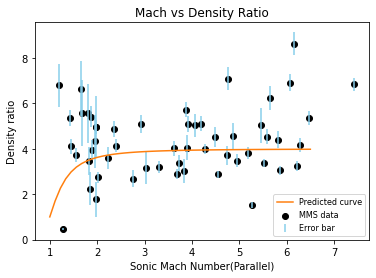

In [72]:
plt.scatter(sonic_Machpara, densityRatio_mms, label='MMS data', color='black')
plt.errorbar(sonic_Machpara, densityRatio_mms, yerr=std_density_R, fmt="o",ms=0, label='Error bar',ecolor='skyblue')
num1= np.linspace(1,6.5)
plt.plot(num1,r, label="Predicted curve")
plt.xlabel("Sonic Mach Number(Parallel)")
plt.ylabel('Density ratio')
plt.legend(loc="lower right", fontsize=8)
plt.title('Mach vs Density Ratio')


Text(0.5, 1.0, 'Mach vs Density Ratio')

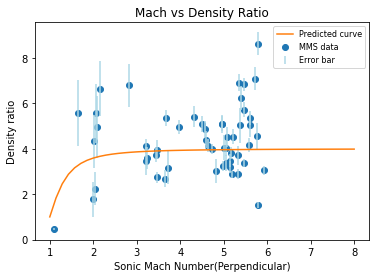

In [16]:
plt.scatter(sonic_Machperp, densityRatio_mms, label='MMS data')
plt.errorbar(sonic_Machperp, densityRatio_mms, yerr=std_density_R, fmt="o",ms=0, label='Error bar',ecolor='lightblue')
plt.plot(num1,r, label="Predicted curve")
plt.xlabel("Sonic Mach Number(Perpendicular)")
plt.ylabel('Density ratio')
plt.legend(loc="upper right",fontsize=8)
plt.title('Mach vs Density Ratio')

Text(0.5, 1.0, 'Sonic Mach Number vs Density Compression Ratio')

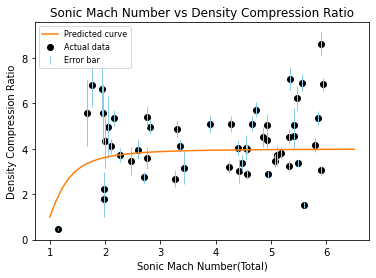

In [113]:
plt.scatter(sonic_Machtot, densityRatio_mms, label='Actual data', color='black')
plt.errorbar(sonic_Machtot, densityRatio_mms, yerr=std_density_R, fmt="o",ms=0, linewidth= 1,label='Error bar',ecolor='skyblue')
plt.plot(num1,r, label="Predicted curve")
plt.xlabel("Sonic Mach Number(Total)")
plt.ylabel('Density Compression Ratio')
plt.legend(loc="upper left",fontsize=8 )
plt.title('Sonic Mach Number vs Density Compression Ratio')

Text(0.5, 1.0, 'Alfvén Mach Number vs Density Compression Ratio')

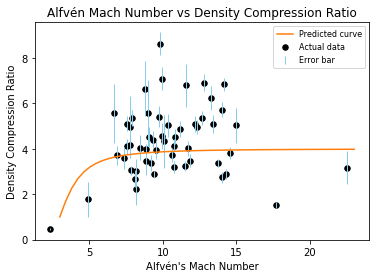

In [118]:
plt.scatter(alfven_Mach, densityRatio_mms, label='Actual data',color='black', s=30)
plt.errorbar(alfven_Mach, densityRatio_mms, yerr=std_density_R, fmt="o",ms=0,linewidth=1, label='Error bar',ecolor="skyblue")
num2= np.linspace(3,23)


plt.plot(num2,r, label="Predicted curve")
plt.xlabel("Alfvén's Mach Number")
plt.ylabel('Density Compression Ratio')
plt.legend(loc="upper right",fontsize=8)
plt.title("Alfvén Mach Number vs Density Compression Ratio")

# Testing Event Section

In [4]:


trange1=['2018-01-10/00:10','2018-01-10/01:30']
pyspedas.mms.fgm(trange=trange1, time_clip=True )


fpi(datatype = 'dis-moms', trange=trange1, center_measurement=True,  time_clip=True)

#dat=get_data('mms1_dis_numberdensity_brst')
#tplot(['mms1_fgm_b_gse_srvy_l2','mms1_dis_numberdensity_fast','mms1_dis_bulkv_dbcs_fast','mms1_dis_temppara_fast'])
#mean=np.mean(dat[1])
#std=np.std(dat[1])
#print(mean, std)


05-Apr-22 22:48:02: Loading pydata/mms1/fgm/srvy/l2/2018/01/mms1_fgm_srvy_l2_20180110_v5.120.0.cdf


Time clip was applied to: mms1_fgm_b_gse_srvy_l2
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2
Time clip was applied to: mms1_fgm_flag_srvy_l2
Time clip was applied to: mms1_fgm_r_gse_srvy_l2
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2
Time clip was applied to: mms1_fgm_hirange_srvy_l2
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms1_fgm_stemp_srvy_l2
Time clip was applied to: mms1_fgm_etemp_srvy_l2
Time clip was applied to: mms1_fgm_mode_srvy_l2
Time clip was applied to: mms1_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1

05-Apr-22 22:48:17: Loading pydata/mms1/fpi/fast/l2/dis-moms/2018/01/mms1_fpi_fast_l2_dis-moms_20180110000000_v3.3.0.cdf
05-Apr-22 22:48:17: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:202: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delta_plus_var = delta_plus_var.astype(float)*np.float(si_conv.split('>')[0])

05-Apr-22 22:48:17: /Users/kkenta234/pyspedas/lib/python3.8/site-packages/pytplot/importers/cdf_to_tplot.py:214: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically

Time clip was applied to: mms1_dis_errorflags_fast
Time clip was applied to: mms1_dis_startdelphi_count_fast
Time clip was applied to: mms1_dis_startdelphi_angle_fast
Time clip was applied to: mms1_dis_energyspectr_px_fast
Time clip was applied to: mms1_dis_energyspectr_mx_fast
Time clip was applied to: mms1_dis_energyspectr_py_fast
Time clip was applied to: mms1_dis_energyspectr_my_fast
Time clip was applied to: mms1_dis_energyspectr_pz_fast
Time clip was applied to: mms1_dis_energyspectr_mz_fast
Time clip was applied to: mms1_dis_energyspectr_omni_fast
Time clip was applied to: mms1_dis_spectr_bg_fast
Time clip was applied to: mms1_dis_numberdensity_bg_fast
Time clip was applied to: mms1_dis_numberdensity_fast
Time clip was applied to: mms1_dis_densityextrapolation_low_fast
Time clip was applied to: mms1_dis_densityextrapolation_high_fast
Time clip was applied to: mms1_dis_bulkv_dbcs_fast
Time clip was applied to: mms1_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms1_dis_b

2022-04-05 22:49:01.361 python[29128:2017524] -[NSNull length]: unrecognized selector sent to instance 0x7ff8495e70c0
2022-04-05 22:49:01.362 python[29128:2017524] Exception calling directoryDidChange: on delegate <QNSOpenSavePanelDelegate: 0x600000cf8770> exception=-[NSNull length]: unrecognized selector sent to instance 0x7ff8495e70c0
2022-04-05 22:49:01.377 python[29128:2017524] -[NSNull length]: unrecognized selector sent to instance 0x7ff8495e70c0
2022-04-05 22:49:01.377 python[29128:2017524] Exception calling directoryDidChange: on delegate <QNSOpenSavePanelDelegate: 0x600000cf8770> exception=-[NSNull length]: unrecognized selector sent to instance 0x7ff8495e70c0
2022-04-05 22:49:22.740 python[29128:2017524] -[NSNull length]: unrecognized selector sent to instance 0x7ff8495e70c0
2022-04-05 22:49:22.740 python[29128:2017524] Exception calling directoryDidChange: on delegate <QNSOpenSavePanelDelegate: 0x600000cf8770> exception=-[NSNull length]: unrecognized selector sent to instanc